<a href="https://colab.research.google.com/github/Patriol-LLC/0625/blob/main/Permutation_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#Dependencies
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [43]:
#Read in the data
csv = pd.read_csv('/content/drive/MyDrive/DATA/FX/USDZAR/USDZAR.csv')

In [44]:
#Inspect the data
csv.head()

,Date,Open,High,Low,Close,Volume
0,2015.12.02,14.4261,14.4503,14.3050,14.3395,19003
1,2015.12.03,14.3409,14.3900,14.2399,14.3515,21686
2,2015.12.04,14.3489,14.4676,14.2651,14.3528,23588
3,2015.12.07,14.3411,14.5624,14.3259,14.5064,15414
4,2015.12.08,14.4997,14.6949,14.4861,14.5819,22924


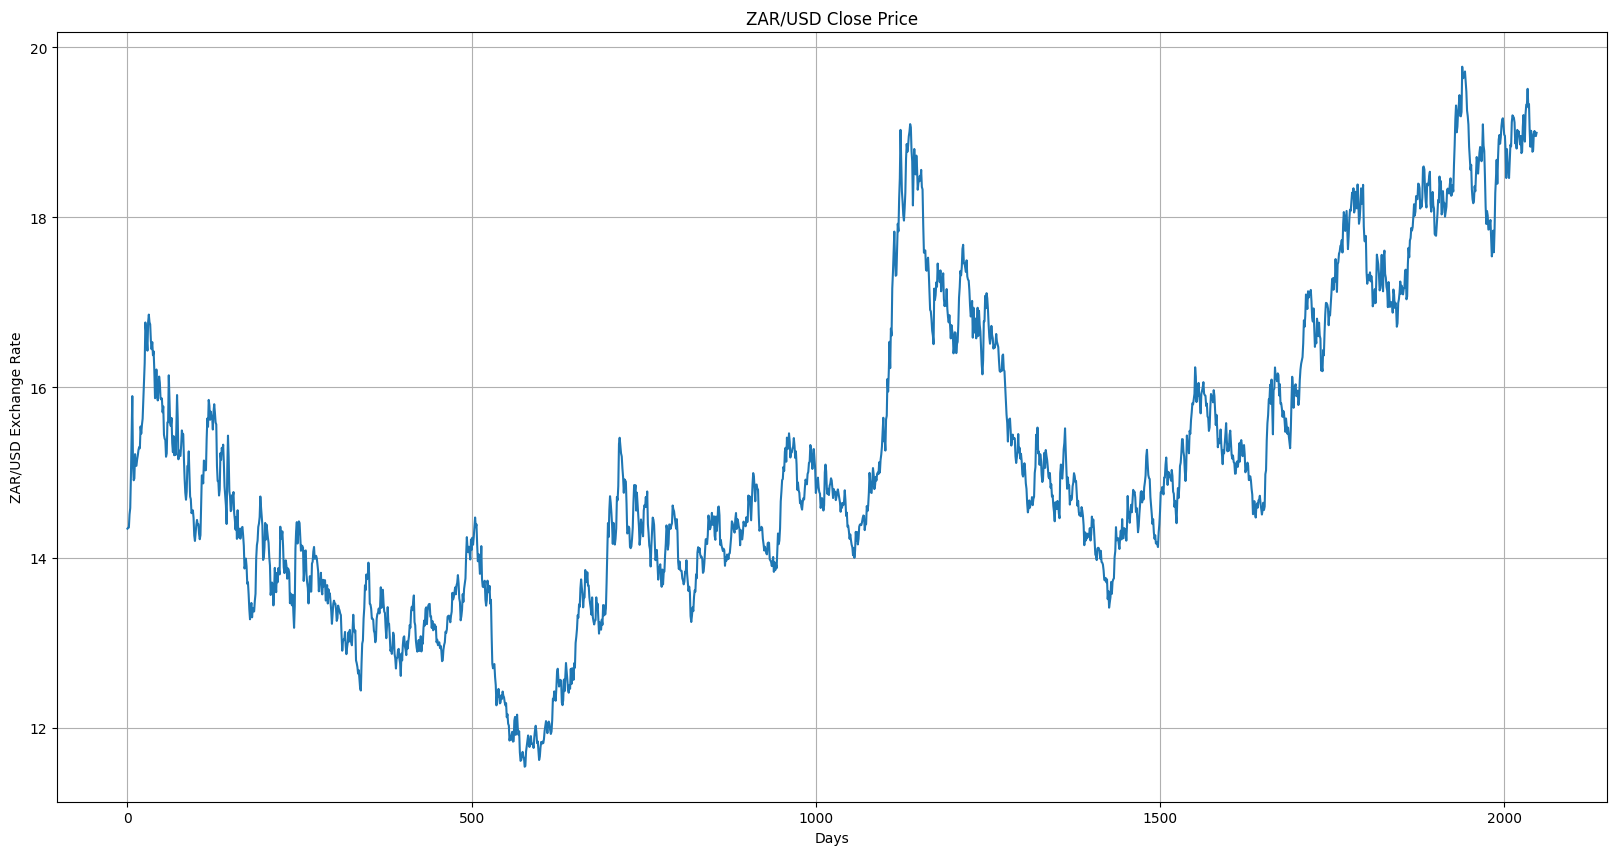

In [45]:
#Plot the data
plt.figure(figsize=(20,10))
plt.plot(csv['Close'])
plt.title('ZAR/USD Close Price')
plt.xlabel('Days')
plt.ylabel('ZAR/USD Exchange Rate')
plt.grid(True)
plt.show()

In [ ]:
#How large is the dataset?
csv.shape

(2048, 6)

In [85]:
#Let's work with a smaller dataframe for this lesson, the first 200 rows for training
df = csv.loc[ 0:199,:]
df.shape

(200, 6)

In [90]:
#Partitioning our dataset into 2/3 for training and 1/3 for validation
train_size = int( len(df) * (2/3))

#Splitting
train_x, train_y = df.loc[0:train_size,['Open','High','Low','Volume']] , df.loc[0:train_size,'Close']
val_x , val_y = df.loc[train_size:len(df),['Open','High','Low','Volume']] , df.loc[train_size:len(df),'Close']

In [91]:
train_x.shape

(134, 4)

In [94]:
train_y.shape

(134,)

In [95]:
val_x.shape

(67, 4)

In [96]:
val_y.shape

(67,)

In [97]:
#Fitting the model
random_forest = RandomForestRegressor(n_estimators=10,random_state=0).fit(train_x,train_y)

In [98]:
#We will use the eli5 library to calculate permutation importance
!pip install --upgrade eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=59456e8121b1b79d4b6beaaa200dcad51270a1c1b342ed72a32d523862f43143
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [101]:
#Import eli5 Permutation Importance
import eli5
from eli5.sklearn import PermutationImportance

In [102]:
#Calculate permutation importance
perm = PermutationImportance(random_forest,random_state=1).fit(val_x,val_y)

#Show eli5 permutation importance calculations
eli5.show_weights(perm, feature_names = val_x.columns.tolist())

Weight,Feature
0.6118 ± 0.1690,High
0.3167 ± 0.1230,Low
0.0006 ± 0.0012,Open
-0.0005 ± 0.0015,Volume


# Partial Dependence Plots

In [114]:
#Import partial dependence display from sklearn
from sklearn.inspection import PartialDependenceDisplay

random_forest_2 = RandomForestRegressor(n_estimators=10,random_state=1).fit(val_x,val_y)
columns_of_interest = ['Open','High','Low','Volume']

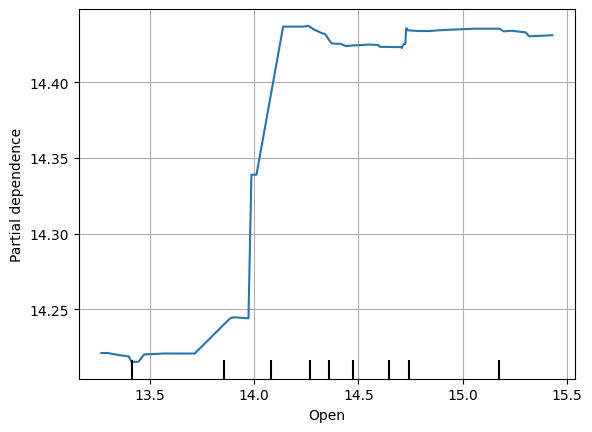

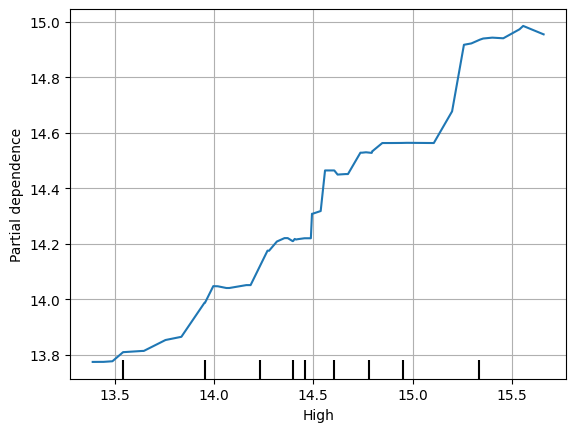

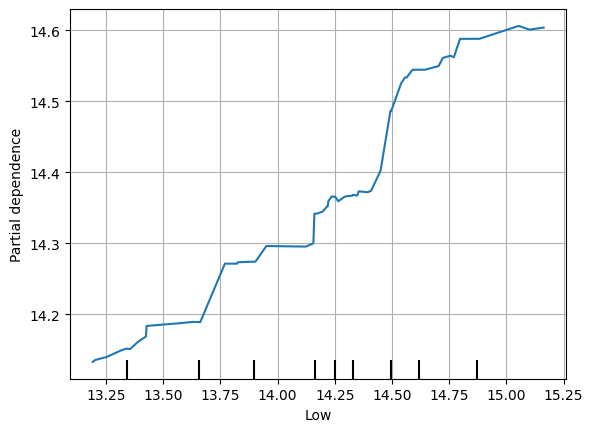

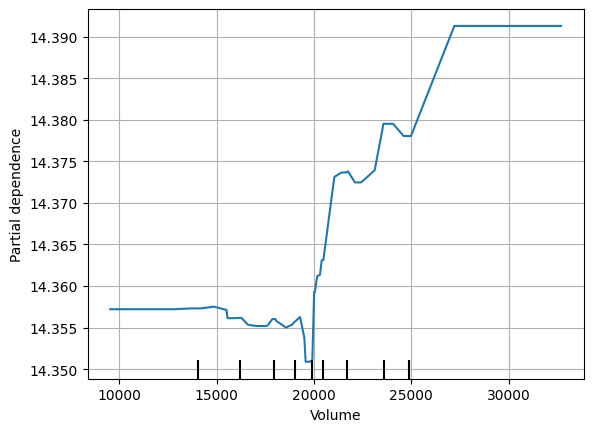

In [115]:
#Create and plot the data for each column
for feature_name in columns_of_interest:
  PartialDependenceDisplay.from_estimator(random_forest_2,val_x,[feature_name])
  plt.grid()
  plt.show()

2D Partial Dependence Plots

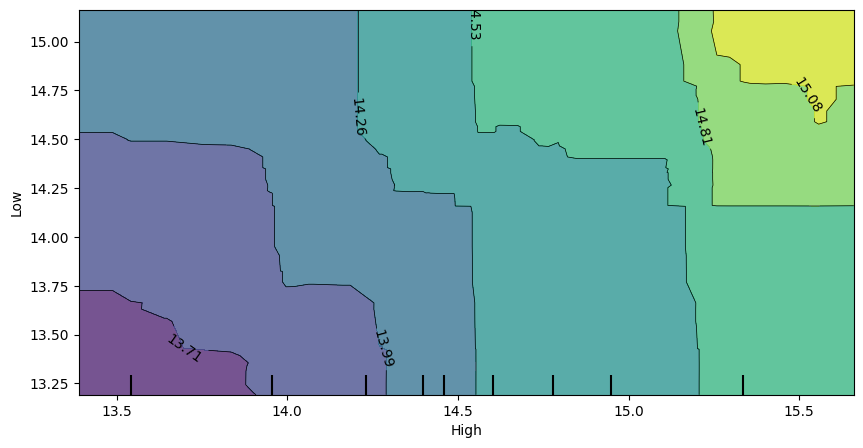

In [112]:
#Setting up the plot
fig , ax = plt.subplots(figsize=(10,5))
column_names = [('High','Low')]

#Plotting 2D PDP
disp_4 = PartialDependenceDisplay.from_estimator(random_forest_2, val_x,column_names, ax=ax)
plt.show()

# SHAP Values

In [135]:
#Creating a third random forest model for this example
random_forest_3 = RandomForestRegressor(random_state=1).fit(train_x,train_y)

In [134]:
#We are going to calculate SHAP Values for the first 10 values
data_to_show = 5
data_for_shap = val_x.iloc[data_to_show]

In [120]:
#Installing the SHAP library
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 9.2 MB/s eta 0:00:00


In [136]:
#Import shap library
import shap

In [137]:
#Initialise shap value calculator
shap_calculator = shap.TreeExplainer(random_forest_3)

#Store SHAP values
shap_values = shap_calculator.shap_values(data_for_shap)

In [138]:
#Plot SHAP values
shap.initjs()
shap.force_plot(shap_calculator.expected_value[1], shap_values[1], data_for_shap)

IndexError: ignored